# 第四次作业

## 1.P22 Rk4

先写一个rongkutta求解器：

In [1]:
import numpy as np

def rongkutta(f, x0, xn, n, y0):
    m = y0.shape[0]  # dim of x
    xst = np.linspace(x0, xn, n)  # list of x
    yst = np.zeros((n, m))  # list of y
    h = (xn - x0) / (n - 1)  # step length
    yst[0] = y0
    for i in range(0, n - 1):
        k1 = f(xst[i], yst[i])
        k2 = f(xst[i] + h / 2, yst[i] + h * k1 / 2)
        k3 = f(xst[i] + h / 2, yst[i] + h * k2 / 2)
        k4 = f(xst[i] + h, yst[i] + h * k3)
        yst[i + 1] = yst[i] + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return (xst, yst)


求解方程：

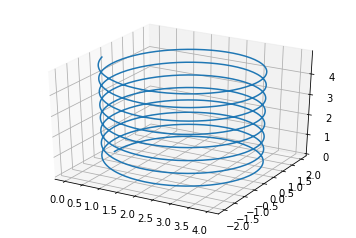

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

def fe(w, y):
    y1 = np.zeros(6)
    y1[0] = y[3]
    y1[1] = y[4]
    y1[2] = y[5]
    y1[3] = w * y[4]
    y1[4] = -w * y[3]
    return y1


def f1(x, y): return fe(1, y)


y0 = np.array([0, 0, 0, 0, 2, 0.1])
xs, ys = rongkutta(f1, 0, 50, 1000, y0)


mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
x, y, z = ys[:, 0], ys[:, 1], ys[:, 2]
ax.plot(x, y, z)
plt.show()


## 2.数值求解方程组

原方程组可以化为：$y0'=y1,y1'=2y1-2y0+e^{2x}\sin(x)$，故代码如下：

In [3]:
def f2(x, y):
    yt = np.zeros(2, dtype=float)
    yt[0] = y[1]
    yt[1] = 2 * y[1] - 2 * y[0] + np.exp(2 * x) * np.sin(x)
    return yt

求解：

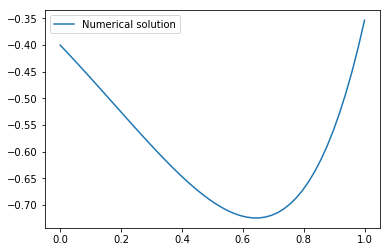

In [4]:
y0 = np.array([-0.4, -0.6])
xs, ys = rongkutta(f2, 0, 1, 50, y0)

plt.figure()
plt.plot(xs, ys[:, 0], label='Numerical solution')
plt.legend()
plt.show()


## 3.P31洛伦兹吸引子

In [5]:
def lorz(b, s, r, y):
    mat = np.array([[-b, 0, y[1]],
                    [0, -s, s],
                    [-y[1], r, -1.]])
    return mat.dot(y)

$\beta=8/3,\sigma=10,\rho=28$

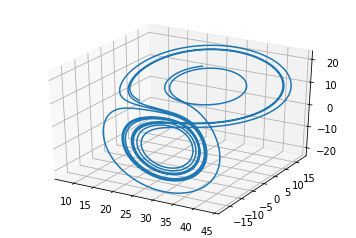

In [6]:
y0 = np.array([12., 4., 0.])
ts, ys = rongkutta(lambda x, y: lorz(8 / 3, 10, 28, y),
                   0, 10, 10000, y0)

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
x, y, z = ys[:, 0], ys[:, 1], ys[:, 2]
ax.plot(x, y, z)
plt.show()

另外两组解：

$\beta=8/3,\sigma=10,\rho=13$

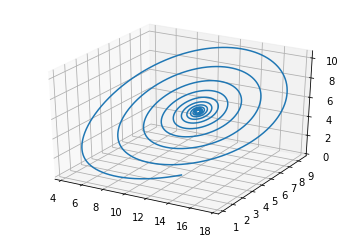

In [7]:
y0 = np.array([12., 4., 0.])
ts, ys = rongkutta(lambda x, y: lorz(8 / 3, 10, 13, y),
                   0, 10, 10000, y0)

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
x, y, z = ys[:, 0], ys[:, 1], ys[:, 2]
ax.plot(x, y, z)
plt.show()

$\beta=8/3,\sigma=20,\rho=28$

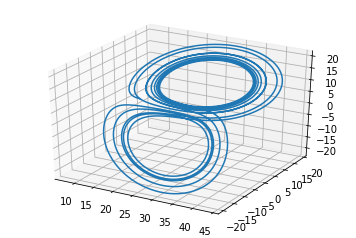

In [8]:
y0 = np.array([12., 4., 0.])
ts, ys = rongkutta(lambda x, y: lorz(8 / 3, 20, 28, y),
                   0, 10, 10000, y0)

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
x, y, z = ys[:, 0], ys[:, 1], ys[:, 2]
ax.plot(x, y, z)
plt.show()

## 4.

构架$\delta$函数的近似：

In [9]:
def f4(x, dx):
    if np.abs(x - 0.4) < dx:
        return 0.5 / dx
    else:
        return 0

解三对角矩阵：

In [10]:
def trilu(a):
    n = a.shape[0]
    l = np.identity(n)
    u = np.zeros((n, n))
    u[0, 0] = a[0, 0]
    u[0, 1] = a[0, 1]
    for i in range(1, n):
        if i < n - 1:
            u[i, i + 1] = a[i, i + 1]
        l[i, i - 1] = a[i, i - 1] / u[i - 1, i - 1]
        u[i, i] = a[i, i] - l[i, i - 1] * u[i - 1, i]
    return (l, u)


def trisolve(a, x):
    n = x.shape[0]
    y = np.zeros(n)
    z = np.zeros(n)
    l, u = trilu(a)
    # Ly=x
    y[0] = x[0]
    for i in range(1, n):
        y[i] = x[i] - l[i, i - 1] * y[i - 1]
    # Uz=y
    z[n - 1] = y[n - 1] / u[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        z[i] = (y[i] - u[i, i + 1] * z[i + 1]) / u[i, i]
    return z


解方程：

In [11]:
# x0,x1,...xn, total n+1
def solvef4(n):
    xn, x0 = 1., 0
    h = (xn - x0) / n
    xs = np.linspace(x0, xn, n + 1)
    mat = np.zeros((n + 1, n + 1))
    mat[0, 0] = mat[n, n] = 1.
    b = np.zeros(n + 1)
    for i in range(1, n):
        mat[i, i - 1] = mat[i, i + 1] = 1
        mat[i, i] = -2
        b[i] = h ** 2 * f4(xs[i], h)
    ys = trisolve(mat, b)
    return (xs, ys)

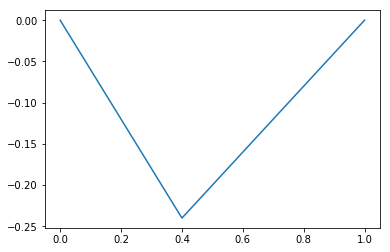

In [12]:
x, y = solvef4(1021)
plt.figure()
plt.plot(x, y)
plt.show()